In [63]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
file = "cleaned_skills_in_progress.csv"
project_df = pd.read_csv(file)
project_df

,Unnamed: 0,C#,R,R,r,r,AGILE,AWS,AWs,AZURE,...,postgresql,python,ql,qlikview,r Cloud,r cloud,tableau,tate,unix,url
0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CA,0.0,https://www.indeed.com/viewjob?jk=fd83355c2b23...
1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NJ,0.0,https://www.dice.com/jobs/detail/Data-Scientis...
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NY,0.0,https://www.dice.com/jobs/detail/Data-Scientis...
3,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NY,0.0,https://www.indeed.com/viewjob?jk=c6db96b37f8a...
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,CA,0.0,https://www.dice.com/jobs/detail/Sr.-Data-Scie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,8737,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AZ,0.0,https://www.careerbuilder.com/job/J3M7GJ67MHP8...
8738,8738,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MA,0.0,https://www.careerbuilder.com/job/J3W24867TTZV...
8739,8739,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CA,0.0,https://job-openings.monster.com/senior-data-s...
8740,8740,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VA,0.0,https://job-openings.monster.com/multi-source-...


In [3]:
#adding Machine learning to skills search of job description

import re


skills = ['Machine', 'ML']

rx = '(?i)(?P<skills>{})'.format('|'.join(re.escape(skills) for skills in skills))

matches = project_df['job_description'].str.extractall(rx)

dummies = pd.get_dummies(matches).max(level=0)
dummies

result = project_df.join(dummies, how='left')

result.head()




,Unnamed: 0,C#,R,R,r,r,AGILE,AWS,AWs,AZURE,...,tate,unix,url,skills_MACHINE,skills_ML,skills_Machine,skills_Ml,skills_mL,skills_machine,skills_ml
0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,CA,0.0,https://www.indeed.com/viewjob?jk=fd83355c2b23...,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NJ,0.0,https://www.dice.com/jobs/detail/Data-Scientis...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NY,0.0,https://www.dice.com/jobs/detail/Data-Scientis...,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NY,0.0,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,CA,0.0,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
list(result.columns)

['Unnamed: 0',
 ' C#',
 ' R',
 ' R ',
 ' r',
 ' r ',
 'AGILE',
 'AWS',
 'AWs',
 'AZURE',
 'Agile',
 'Azure',
 'Data Studio',
 'Degree',
 'DEGREE',
 'GoLang',
 'Golang',
 'HADOOP',
 'HIVE',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'INsight',
 'Insight',
 'JAVA',
 'Java',
 'Jupyter',
 'KAFKA',
 'KafKa',
 'Kafka',
 'MATLAB',
 'ML',
 'MatLab',
 'MatPlotLib',
 'Matlab',
 'MatplotLib',
 'Matplotlib',
 'Ml',
 'NOSQL',
 'NoSQL',
 'NoSql',
 'Nosql',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'Pandas',
 'Perl',
 'Pig',
 'PostGreSQL',
 'PostgreSQL',
 'PostgreSql',
 'PostgresQL',
 'Postgresql',
 'PowerBI',
 'PYTHON',
 'Python',
 'PowerBi',
 'QlikView',
 'Qlikview',
 'SCALA',
 'SPARK',
 'SQL',
 'ScIkit-learn',
 'Scala',
 'SciKit-Learn',
 'SciKit-learn',
 'Scikit-Learn',
 'Scikit-learn',
 'Spark',
 'Sql',
 'Tableau',
 'UNIX',
 'Unix',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'afka',
 'agile',
 'alary_offered',
 'aws',
 'azure',
 'cala',
 'category',
 'cikit-learn',
 'city',
 'company_name'

In [5]:
# create function to add new column for r

def f(row):
    if row[' R'] + row[' R '] + row[' r'] + row[' r '] >= 1:
        val = 1
    else:
        val = 0
    return val

result['cleaned R'] = result.apply(f, axis=1)


In [6]:
# create functions to account for duplicate skills findings for 2-6 columns

def f2(row):
    if row[x] + row[y] >= 1:
        val = 1
    else:
        val = 0
    return val



def f3(row):
    if row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val

def f4(row):
    if row[w] + row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val

def f5(row):
    if row[v] + row[w] + row[x] + row[y]+ row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val


def f6(row):
    if row [u] + row[v] + row[w] + row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val

def f7(row):
    if row[t] + row [u] + row[v] + row[w] + row[x] + row[y] + row[z]  >= 1:
        val = 1
    else:
        val = 0
    return val


In [7]:
#list(project_df.columns) 

In [8]:
#set variables for column names

x = 'AGILE'
y = 'Agile'
z = 'agile'

# apply function
result['cleaned Agile'] = result.apply(f3, axis=1)

In [9]:
x = 'AWS'
y = 'AWs'
z = 'aws'
#apply function
result['cleaned AWS'] = result.apply(f3, axis=1)

In [10]:
#set variables for column names
x = 'AZURE'
y = 'Azure'
z = 'azure'

result['cleaned Azure'] = result.apply(f3, axis=1)


In [11]:


x = 'Degree'
y = 'DEGREE'
z = 'degree'

result['cleaned Degree'] = result.apply(f3, axis=1)


In [12]:
#set variables for column names

x = 'GoLang'
y = 'Golang'
z = 'golang'
#apply function
result['cleaned GOLang'] = result.apply(f3, axis=1)


In [13]:

x = 'HADOOP'
y = 'Hadoop'
z = 'hadoop'
result['cleaned Hadoop'] = result.apply(f3, axis=1)


In [14]:
#set variables for column names

x = 'HIVE'
y = 'Hive'
z = 'hive'
#apply function
result['cleaned Hive'] = result.apply(f3, axis=1)


In [15]:
#list(project_df.columns)

In [16]:
#set variables for column names
x = 'INsight'
y = 'Insight'
z = 'INSIGHT'
w = 'nsight'
#apply function
result['Cleaned Insight'] = result.apply(f4, axis=1)


In [17]:
x = 'JAVA'
y = 'Java'
z = 'java'
#apply function
result['cleaned JAVA'] = result.apply(f3, axis=1)

In [18]:
x = 'Jupyter'
y = 'jupyter'

#set variables for column names
result['cleaned JUPYTER'] = result.apply(f2, axis=1)

In [19]:
#set variables for column names

x = 'KAFKA'
y = 'KafKa'
z = 'Kafka' 
w = 'afka'
#apply function
result['cleaned KAFKA'] = result.apply(f4, axis=1)

In [20]:
x = 'MATLAB'
y = 'MatLab'
z = 'matlab'

#apply function
result['cleaned MATLAB'] = result.apply(f3, axis=1)

In [21]:
w = 'MatPlotLib'
x = 'MatplotLib'
y = 'Matplotlib'
z = 'matplotlib'

result['cleaned MATPLOTLIB'] = result.apply(f4, axis=1)

In [22]:
#set variables for column names

v = 'NOSQL'
w = 'NoSQL'
x =  'NoSql'
y =  'Nosql'
z = 'noSQL'



result['cleaned NOSQL'] = result.apply(f5, axis=1)

In [23]:
x = 'PANDAS'
y = 'Pandas'
z = 'pandas'

#apply function
result['cleaned PANDAS'] = result.apply(f3, axis=1)

In [24]:
x = 'PERL'
y = 'Perl'
z = 'perl'

#apply function
result['cleaned PERL'] = result.apply(f3, axis=1)

In [25]:
x = 'PIG'
y = 'Pig'
z = 'pig'

#apply function
result['cleaned PIG'] = result.apply(f3, axis=1)

In [26]:
#set variables for column names

u = 'PostGreSQL'
v = 'PostgreSQL'
w = 'PostgreSql'
x = 'PostgresQL'
y = 'Postgresql'
z = 'postgresql'

result['cleaned POSTGRESQL'] = result.apply(f6, axis=1)


In [27]:
x = 'PowerBI'
y =  'PowerBi'

result['cleaned POWERBI'] = result.apply(f2, axis=1)


In [28]:
x = 'PYTHON'
y = 'Python'
z = 'python'

#apply function
result['cleaned PYTHON'] = result.apply(f3, axis=1)

In [29]:
x ='QlikView'
y ='Qlikview'
z = 'qlikview'

#apply function
result['cleaned QLIKVIEW'] = result.apply(f3, axis=1)

In [30]:
x ='r Cloud'
y = 'r cloud'

result['cleaned R CLOUD'] = result.apply(f2, axis=1)

In [31]:
x = 'SCALA'
y =  'Scala'
z = 'cala'

result['cleaned SCALA'] = result.apply(f3, axis=1)


In [32]:
#set variables for column names

x = 'SPARK'
y =  'Spark'
z = 'park'

result['cleaned SPARK'] = result.apply(f3, axis=1)


In [33]:
x = 'SQL'
y =  'Sql'

result['cleaned SQL'] = result.apply(f2, axis=1)


In [34]:
#list(project_df.columns)

In [35]:
#set variables for column names

u = 'cikit-learn'
v = 'ScIkit-learn'
x = 'SciKit-Learn'
y = 'SciKit-learn'
w = 'Scikit-Learn'
z = 'Scikit-learn'

result['cleaned SCIKITLEARN'] = result.apply(f6, axis=1)


In [36]:
x= 'Tableau'
y= 'tableau'

result['TABLEAU'] = result.apply(f2, axis=1)

In [37]:
x = 'UNIX'
y =  'Unix'
z = 'unix'

result['cleaned UNIX'] = result.apply(f3, axis=1)


In [38]:
t='skills_MACHINE'
u ='skills_ML'
v ='skills_Machine'
w = 'skills_Ml'
x ='skills_mL'
y = 'skills_machine'
z = 'skills_ml'

result['cleaned MACHINE LEARNING'] = result.apply(f7, axis=1)


In [39]:
result.head()

,Unnamed: 0,C#,R,R,r,r,AGILE,AWS,AWs,AZURE,...,cleaned PYTHON,cleaned QLIKVIEW,cleaned R CLOUD,cleaned SCALA,cleaned SPARK,cleaned SQL,cleaned SCIKITLEARN,TABLEAU,cleaned UNIX,cleaned MACHINE LEARNING
0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,1,0,1,0,1
1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,1
3,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,1,0,0
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,1,0,0,1,1


In [40]:
list(result.columns)

['Unnamed: 0',
 ' C#',
 ' R',
 ' R ',
 ' r',
 ' r ',
 'AGILE',
 'AWS',
 'AWs',
 'AZURE',
 'Agile',
 'Azure',
 'Data Studio',
 'Degree',
 'DEGREE',
 'GoLang',
 'Golang',
 'HADOOP',
 'HIVE',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'INsight',
 'Insight',
 'JAVA',
 'Java',
 'Jupyter',
 'KAFKA',
 'KafKa',
 'Kafka',
 'MATLAB',
 'ML',
 'MatLab',
 'MatPlotLib',
 'Matlab',
 'MatplotLib',
 'Matplotlib',
 'Ml',
 'NOSQL',
 'NoSQL',
 'NoSql',
 'Nosql',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'Pandas',
 'Perl',
 'Pig',
 'PostGreSQL',
 'PostgreSQL',
 'PostgreSql',
 'PostgresQL',
 'Postgresql',
 'PowerBI',
 'PYTHON',
 'Python',
 'PowerBi',
 'QlikView',
 'Qlikview',
 'SCALA',
 'SPARK',
 'SQL',
 'ScIkit-learn',
 'Scala',
 'SciKit-Learn',
 'SciKit-learn',
 'Scikit-Learn',
 'Scikit-learn',
 'Spark',
 'Sql',
 'Tableau',
 'UNIX',
 'Unix',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'afka',
 'agile',
 'alary_offered',
 'aws',
 'azure',
 'cala',
 'category',
 'cikit-learn',
 'city',
 'company_name'

In [41]:
#remove unwanted columns


cleaned_skills = result.drop([' R',
 ' R ',
 ' r',
 ' r ',
 'AGILE',
 'AWS',
 'AWs',
 'AZURE',
 'Agile',
 'Azure',
 
 'Degree',
 'DEGREE',
 'GoLang',
 'Golang',
 'HADOOP',
 'HIVE',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'INsight',
 'Insight',
 'JAVA',
 'Java',
 'Jupyter',
 'KAFKA',
 'KafKa',
 'Kafka',
 'MATLAB',
 'ML',
 'MatLab',
 'MatPlotLib',
 'Matlab',
 'MatplotLib',
 'Matplotlib',
 'Ml',
 'NOSQL',
 'NoSQL',
 'NoSql',
 'Nosql',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'Pandas',
 'Perl',
 'Pig',
 'PostGreSQL',
 'PostgreSQL',
 'PostgreSql',
 'PostgresQL',
 'Postgresql',
 'PowerBI',
 'PYTHON',
 'Python',
 'PowerBi',
 'QlikView',
 'Qlikview',
 'SCALA',
 'SPARK',
 'SQL',
 'ScIkit-learn',
 'Scala',
 'SciKit-Learn',
 'SciKit-learn',
 'Scikit-Learn',
 'Scikit-learn',
 'Spark',
 'Sql',
 'UNIX',
 'Unix', 'afka', 'agile','aws','azure', 'cala','cikit-learn', 'degree', 'golang', 'hadoop',
 'hive',
 'java',
 'jupyter',
 'mL',
 'matlab',
 'matplotlib',
 'ml',
 'noSQL',
 'nsight',
 'pandas',
 'park',
 'perl',
 'pig',
 'postgresql',
 'python',
 'ql',
 'qlikview',
 'r Cloud',
 'r cloud',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'Unnamed: 0',
 'unix',
 'country',
 'job_board',
 'job_description',
 'url',
 'job_type',
 'company_name', 'Tableau', 'tableau',
 'Cleaned Insight',
 'skills_MACHINE',
 'skills_ML',
 'skills_Machine',
 'skills_Ml',
 'skills_mL',
 'skills_machine',
 'skills_ml'], axis = 1)

In [42]:
list(cleaned_skills.columns)

[' C#',
 'Data Studio',
 'alary_offered',
 'category',
 'city',
 'extracted_job_board',
 'job_title',
 'tate',
 'cleaned R',
 'cleaned Agile',
 'cleaned AWS',
 'cleaned Azure',
 'cleaned Degree',
 'cleaned GOLang',
 'cleaned Hadoop',
 'cleaned Hive',
 'cleaned JAVA',
 'cleaned JUPYTER',
 'cleaned KAFKA',
 'cleaned MATLAB',
 'cleaned MATPLOTLIB',
 'cleaned NOSQL',
 'cleaned PANDAS',
 'cleaned PERL',
 'cleaned PIG',
 'cleaned POSTGRESQL',
 'cleaned POWERBI',
 'cleaned PYTHON',
 'cleaned QLIKVIEW',
 'cleaned R CLOUD',
 'cleaned SCALA',
 'cleaned SPARK',
 'cleaned SQL',
 'cleaned SCIKITLEARN',
 'TABLEAU',
 'cleaned UNIX',
 'cleaned MACHINE LEARNING']

In [43]:
# fixing column names


# cleaned_skills.rename(columns={'alary_offered': 'salary_offered', 'tate': 'state'})

In [44]:
#removing prefix 'cleaned' from columns'
cleaned_skills.columns = cleaned_skills.columns.str.lstrip('cleaned ')

cleaned_skills.head()

,C#,Data Studio,ry_offered,tegory,ity,xtracted_job_board,job_title,tate,R,Agile,...,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX,MACHINE LEARNING
0,0.0,0.0,NaN,Accounting/Finance,Woodland Hills,indeed,data scientist,CA,1,0,...,1,1,0,0,0,1,0,1,0,1
1,0.0,0.0,NaN,NaN,Middletown,dice,data scientist,NJ,1,0,...,1,0,0,0,0,1,0,0,0,1
2,0.0,0.0,NaN,NaN,New York,dice,data scientist,NY,1,0,...,0,0,0,1,1,0,0,0,0,1
3,0.0,0.0,NaN,Accounting/Finance,New York,indeed,data scientist,NY,1,0,...,1,0,0,1,0,1,0,1,0,0
4,0.0,0.0,NaN,NaN,Santa Clara,dice,data scientist,CA,1,0,...,1,0,1,0,1,1,0,0,1,1


In [45]:
final_skills = cleaned_skills.rename(columns={'ry_offered': 'salary_offered', 'tegory': 'category','ity':'city','xtracted_job_board': 'job_board', 'Cleaned Insight': 'INSIGHT', 'Data Studio': 'DATA STUDIO','tate': 'state'})

final_skills.head()

,C#,DATA STUDIO,salary_offered,category,city,job_board,job_title,state,R,Agile,...,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX,MACHINE LEARNING
0,0.0,0.0,NaN,Accounting/Finance,Woodland Hills,indeed,data scientist,CA,1,0,...,1,1,0,0,0,1,0,1,0,1
1,0.0,0.0,NaN,NaN,Middletown,dice,data scientist,NJ,1,0,...,1,0,0,0,0,1,0,0,0,1
2,0.0,0.0,NaN,NaN,New York,dice,data scientist,NY,1,0,...,0,0,0,1,1,0,0,0,0,1
3,0.0,0.0,NaN,Accounting/Finance,New York,indeed,data scientist,NY,1,0,...,1,0,0,1,0,1,0,1,0,0
4,0.0,0.0,NaN,NaN,Santa Clara,dice,data scientist,CA,1,0,...,1,0,1,0,1,1,0,0,1,1


In [46]:
list(final_skills.columns)

['C#',
 'DATA STUDIO',
 'salary_offered',
 'category',
 'city',
 'job_board',
 'job_title',
 'state',
 'R',
 'Agile',
 'AWS',
 'Azure',
 'Degree',
 'GOLang',
 'Hadoop',
 'Hive',
 'JAVA',
 'JUPYTER',
 'KAFKA',
 'MATLAB',
 'MATPLOTLIB',
 'NOSQL',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'POWERBI',
 'PYTHON',
 'QLIKVIEW',
 'R CLOUD',
 'SCALA',
 'SPARK',
 'SQL',
 'SCIKITLEARN',
 'TABLEAU',
 'UNIX',
 'MACHINE LEARNING']

In [47]:
column_order = ['job_title', 'salary_offered', 'category', 'job_board', 'city', 'state', 'C#',
'R',
 'Agile',
 'AWS',
 'Azure',
 'DATA STUDIO',   
 'Degree',
 'GOLang',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'JAVA',
 'KAFKA',
 'MACHINE LEARNING',             
 'MATLAB',
 'MATPLOTLIB',
 'NOSQL',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'POWERBI',
 'PYTHON',
 'QLIKVIEW',
 'R CLOUD',
 'SCALA',
 'SPARK',
 'SQL',
 'SCIKITLEARN',
 'TABLEAU',
 'UNIX']

final_skills = final_skills.reindex(columns=column_order)



In [48]:
final_skills
final_skills.to_csv('final_skills.csv')




In [49]:
pd.set_option("display.max_columns", None)

final_skills.head()

,job_title,salary_offered,category,job_board,city,state,C#,R,Agile,AWS,Azure,DATA STUDIO,Degree,GOLang,Hadoop,Hive,INSIGHT,JAVA,KAFKA,MACHINE LEARNING,MATLAB,MATPLOTLIB,NOSQL,PANDAS,PERL,PIG,POSTGRESQL,POWERBI,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX
0,data scientist,NaN,Accounting/Finance,indeed,Woodland Hills,CA,0.0,1,0,0,0,0.0,1,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0
1,data scientist,NaN,NaN,dice,Middletown,NJ,0.0,1,0,0,0,0.0,0,0,0,1,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,data scientist,NaN,NaN,dice,New York,NY,0.0,1,0,0,0,0.0,1,0,1,0,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,data scientist,NaN,Accounting/Finance,indeed,New York,NY,0.0,1,0,0,0,0.0,1,0,0,0,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
4,data scientist,NaN,NaN,dice,Santa Clara,CA,0.0,1,0,0,0,0.0,0,0,1,1,NaN,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1


In [50]:

#create get sums of all the skills and create df

skills_total = final_skills.sum(axis=0)

skills_total2 = pd.DataFrame(skills_total) 

skills_total2.head()

,0
job_title,data scientistdata scientistdata scientistdata...
job_board,indeeddicediceindeeddicediceindeeddiceindeedin...
C#,183
R,8699
Agile,1009


In [51]:
skills_total2.drop(['job_title', 'job_board'])
skills_total2.head()

,0
job_title,data scientistdata scientistdata scientistdata...
job_board,indeeddicediceindeeddicediceindeeddiceindeedin...
C#,183
R,8699
Agile,1009


In [52]:

final_totals = skills_total2.drop(skills_total2.index[[0,1]])
plot_data = final_totals.reset_index()

In [53]:
plot_data2 = plot_data.rename(columns={"index": "skill", '0': 'total'})
plot_data2.head()

,skill,0
0,C#,183
1,R,8699
2,Agile,1009
3,AWS,1810
4,Azure,803


In [54]:

list(plot_data2.columns)


['skill', 0]

In [55]:
plot_data2.columns.values[1] = 'total'

In [56]:
 plot_data2.head()

,skill,total
0,C#,183
1,R,8699
2,Agile,1009
3,AWS,1810
4,Azure,803


In [57]:
list(plot_data2.columns)

['skill', 'total']

In [58]:
x = plot_data2.iloc[: , 1]


plot_data2['TOTAL'] = x

plot_data2.head()

,skill,total,TOTAL
0,C#,183,183
1,R,8699,8699
2,Agile,1009,1009
3,AWS,1810,1810
4,Azure,803,803


In [59]:
x = plot_data2['TOTAL'].values.tolist()
print(x)

x_2 = x

plot_data2['TOTAL'] = x_2

[183.0, 8699, 1009, 1810, 803, 16.0, 5447, 21, 2364, 1310, 0.0, 2134, 393, 6609, 423, 302, 760, 654, 351, 437, 170, 188, 6928, 177, 252, 2025, 2638, 4844, 615, 1845, 394]


In [60]:
top_15 = plot_data2.nlargest(15,'TOTAL')


top_15 = top_15.drop('total', 1)


top_15['TOTAL'].sum()

49225.0

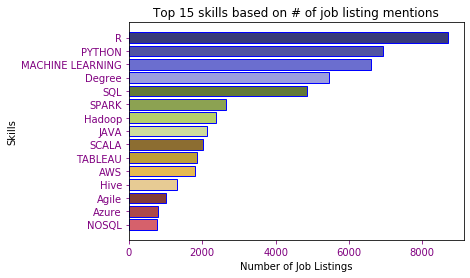

<Figure size 432x288 with 0 Axes>

In [64]:

x_axis = top_15['skill']
total = top_15['TOTAL']

cs=cm.tab20b(np.arange(20)/20.)
plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills based on # of job listing mentions')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()

plt.show()

plt.savefig("images/top_15 skills.png")

In [65]:
junior_df=final_skills[final_skills['job_title']=="junior data scientist"]
mid_level_df=final_skills[final_skills['job_title']=="data scientist"]
senior_df=final_skills[final_skills['job_title']=="senior data scientist"]



In [66]:
jr_skills = junior_df.sum(axis=0)

jr_skills2 = pd.DataFrame(jr_skills) 

jr_skills2.drop(['job_title', 'job_board'])
jr_totals = jr_skills2.drop(jr_skills2.index[[0,1]])
jr_plot = jr_totals.reset_index()

jr_plot.columns.values[1] = 'total'

x = jr_plot.iloc[: , 1]


jr_plot['TOTAL'] = x



In [67]:
jr_skills2.drop(['job_title', 'job_board'])
jr_totals = jr_skills2.drop(jr_skills2.index[[0,1]])
jr_plot = jr_totals.reset_index()

jr_plot.columns.values[1] = 'total'

x = jr_plot.iloc[: , 1]


jr_plot['TOTAL'] = x


In [68]:
x = jr_plot['TOTAL'].values.tolist()
x_2 = x

jr_plot['TOTAL'] = x_2

jr_15 = jr_plot.nlargest(15,'TOTAL')


jr_15 = jr_15.drop('total', 1)


jr_15.head()

,index,TOTAL
1,R,364.0
22,PYTHON,300.0
6,Degree,265.0
13,MACHINE LEARNING,264.0
27,SQL,190.0


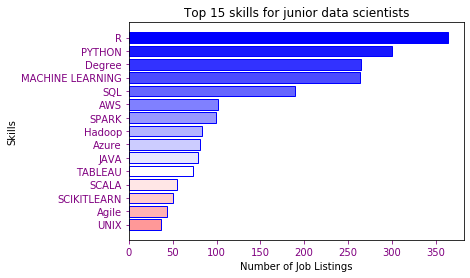

<Figure size 432x288 with 0 Axes>

In [69]:
x_axis = jr_15['index']
total = jr_15['TOTAL']

cs=cm.bwr(np.arange(20)/20.)
plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills for junior data scientists')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()

plt.show()

plt.savefig("images/jr_top_15 skills.png")


In [70]:
mid_skills = mid_level_df.sum(axis=0)
mid_skills2 = pd.DataFrame(mid_skills) 

mid_skills2.drop(['job_title', 'job_board'])
mid_totals = mid_skills2.drop(mid_skills2.index[[0,1]])
mid_plot = mid_totals.reset_index()

mid_plot.columns.values[1] = 'total'

x = mid_plot.iloc[: , 1]


mid_plot['TOTAL'] = x


In [71]:
x = mid_plot['TOTAL'].values.tolist()
x_2 = x

mid_plot['TOTAL'] = x_2

mid_15 = mid_plot.nlargest(15,'TOTAL')


mid_15 = mid_15.drop('total', 1)


mid_15

,index,TOTAL
1,R,6288.0
22,PYTHON,4986.0
13,MACHINE LEARNING,4715.0
6,Degree,3923.0
27,SQL,3533.0
26,SPARK,1815.0
8,Hadoop,1670.0
11,JAVA,1526.0
25,SCALA,1407.0
29,TABLEAU,1326.0


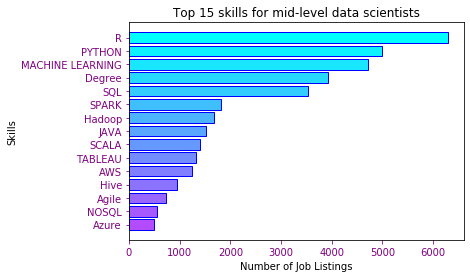

<Figure size 432x288 with 0 Axes>

In [72]:
x_axis = mid_15['index']
total = mid_15['TOTAL']
cs=cm.cool(np.arange(20)/20.)

plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills for mid-level data scientists')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()

plt.show()

plt.savefig("images/mid_top_15 skills.png")

In [74]:
sr_skills = senior_df.sum(axis=0)
sr_skills2 = pd.DataFrame(sr_skills) 

sr_skills2.drop(['job_title', 'job_board'])
sr_totals = sr_skills2.drop(sr_skills2.index[[0,1]])
sr_plot = sr_totals.reset_index()

sr_plot.columns.values[1] = 'total'

x = sr_plot.iloc[: , 1]


sr_plot['TOTAL'] = x


In [75]:
x = sr_plot['TOTAL'].values.tolist()
x_2 = x

sr_plot['TOTAL'] = x_2

sr_15 = sr_plot.nlargest(15,'TOTAL')


sr_15 = sr_15.drop('total', 1)


sr_15.head()

,index,TOTAL
1,R,2047.0
22,PYTHON,1642.0
13,MACHINE LEARNING,1630.0
6,Degree,1259.0
27,SQL,1121.0


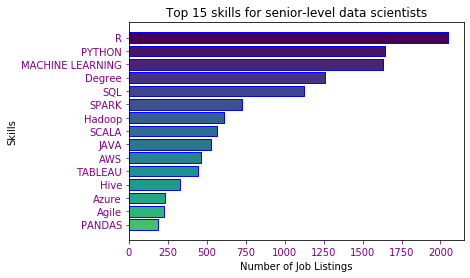

<Figure size 432x288 with 0 Axes>

In [76]:
x_axis = sr_15['index']
total = sr_15['TOTAL']
cs=cm.viridis(np.arange(20)/20.)

plt.barh(x_axis, total, color =cs, edgecolor = 'blue')


#Set descriptions:
plt.title('Top 15 skills for senior-level data scientists')
plt.xlabel('Number of Job Listings')
plt.ylabel('Skills')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='purple')
ax.tick_params(axis='y', colors='purple')
plt.gca().invert_yaxis()

plt.show()
plt.savefig("images/sr_top_15 skills.png")

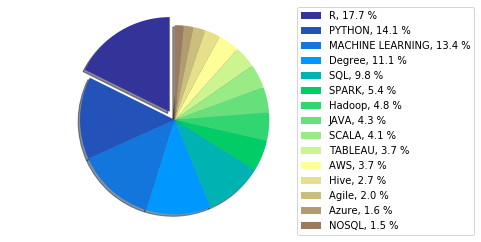

<Figure size 432x288 with 0 Axes>

In [78]:



labels = top_15['skill']
sizes = top_15['TOTAL'] / top_15['TOTAL'].sum() * 100


cs=cm.terrain(np.arange(20)/20.)
explode = (0.1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0)  
patches, texts = plt.pie(sizes, colors = cs, explode=explode, shadow=True, startangle=90)

plt.legend( loc = 'upper left', bbox_to_anchor=(0.85,1.025), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])


plt.axis('equal')

plt.show()

plt.savefig("images/top_15_skills_pie.png")


In [79]:
count = 1
final_skills['count'] = count 


by_title = final_skills.groupby('job_title', as_index=False)['count', 'C#',
'R',
 'Agile',
 'AWS',
 'Azure',
 'DATA STUDIO',   
 'Degree',
 'GOLang',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'JAVA',
 'KAFKA',
 'MACHINE LEARNING',             
 'MATLAB',
 'MATPLOTLIB',
 'NOSQL',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'POWERBI',
 'PYTHON',
 'QLIKVIEW',
 'R CLOUD',
 'SCALA',
 'SPARK',
 'SQL',
 'SCIKITLEARN',
 'TABLEAU',
 'UNIX'].sum()




by_title['job_total'] = len(by_title['job_title'])
by_title.head()

C:\Users\winyi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,job_title,count,C#,R,Agile,AWS,Azure,DATA STUDIO,Degree,GOLang,Hadoop,Hive,INSIGHT,JAVA,KAFKA,MACHINE LEARNING,MATLAB,MATPLOTLIB,NOSQL,PANDAS,PERL,PIG,POSTGRESQL,POWERBI,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX,job_total
0,data scientist,6326,134.0,6288,738,1244,488,8.0,3923,8,1670,949,0.0,1526,291,4715,300,245,559,450,232,305,145,150,4986,140,183,1407,1815,3533,421,1326,263,3
1,junior data scientist,365,3.0,364,43,102,81,2.0,265,0,83,31,0.0,79,3,264,22,9,17,16,19,11,8,7,300,7,3,55,99,190,50,73,37,3
2,senior data scientist,2051,46.0,2047,228,464,234,6.0,1259,13,611,330,0.0,529,99,1630,101,48,184,188,100,121,17,31,1642,30,66,563,724,1121,144,446,94,3


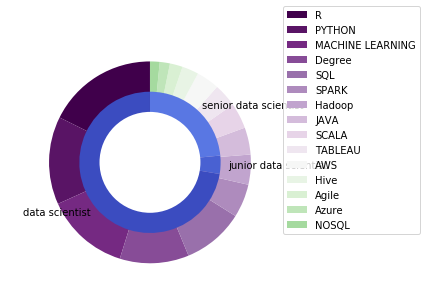

In [80]:
# Data to plot
labels = top_15['skill']
sizes = top_15['TOTAL'] 
labels_job = by_title['job_title']
sizes_job = by_title['count']

cs=cm.PRGn(np.arange(20)/20.)
cs2 = cm.coolwarm(np.arange(20)/20.)

# Plot
plt.pie(sizes, colors=cs,startangle=90,frame=True)
plt.pie(sizes_job,colors=cs2,labels = labels_job,radius=0.70,startangle=90,)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend( loc = 'upper left', bbox_to_anchor=(.95,1.225), labels=labels)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

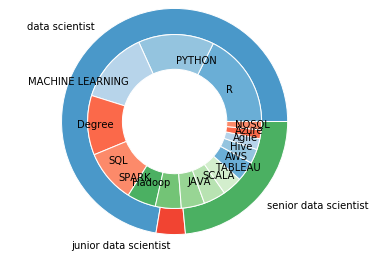

In [81]:




group_names=by_title['job_title']
group_size=by_title['count']
subgroup_names=top_15['skill']
subgroup_size=top_15['TOTAL']

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


In [82]:
by_title

,job_title,count,C#,R,Agile,AWS,Azure,DATA STUDIO,Degree,GOLang,Hadoop,Hive,INSIGHT,JAVA,KAFKA,MACHINE LEARNING,MATLAB,MATPLOTLIB,NOSQL,PANDAS,PERL,PIG,POSTGRESQL,POWERBI,PYTHON,QLIKVIEW,R CLOUD,SCALA,SPARK,SQL,SCIKITLEARN,TABLEAU,UNIX,job_total
0,data scientist,6326,134.0,6288,738,1244,488,8.0,3923,8,1670,949,0.0,1526,291,4715,300,245,559,450,232,305,145,150,4986,140,183,1407,1815,3533,421,1326,263,3
1,junior data scientist,365,3.0,364,43,102,81,2.0,265,0,83,31,0.0,79,3,264,22,9,17,16,19,11,8,7,300,7,3,55,99,190,50,73,37,3
2,senior data scientist,2051,46.0,2047,228,464,234,6.0,1259,13,611,330,0.0,529,99,1630,101,48,184,188,100,121,17,31,1642,30,66,563,724,1121,144,446,94,3


In [ ]:
# Data to plot
labels = top_15['skill']
sizes = top_15['TOTAL']
labels_jobs = by_title['job_title']
sizes_jobs = by_title[['C#',
'R',
 'Agile',
 'AWS',
 'Azure',
 'DATA STUDIO',   
 'Degree',
 'GOLang',
 'Hadoop',
 'Hive',
 'INSIGHT',
 'JAVA',
 'KAFKA',
 'MACHINE LEARNING',             
 'MATLAB',
 'MATPLOTLIB',
 'NOSQL',
 'PANDAS',
 'PERL',
 'PIG',
 'POSTGRESQL',
 'POWERBI',
 'PYTHON',
 'QLIKVIEW',
 'R CLOUD',
 'SCALA',
 'SPARK',
 'SQL',
 'SCIKITLEARN',
 'TABLEAU',
 'UNIX']]
sizes_jobs.head()

# colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
# colors_jobs = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
    
# Create colors
# a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# # First Ring (outside)
# fig, ax = plt.subplots()
# ax.axis('equal')
# mypie, _ = ax.pie(sizes, radius=1.3, labels=labels, colors=[a(0.6), b(0.6), c(0.6)] )
# plt.setp( mypie, width=0.3, edgecolor='white')
 
# # Second Ring (Inside)
# mypie2, _ = ax.pie(sizes_jobs, radius=1.3-0.3, labels=labels_jobs, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
# plt.setp( mypie2, width=0.4, edgecolor='white')
# plt.margins(0,0)
 
# # show it
# plt.show()
    
    
    
    
# # Plot
# plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
# plt.pie(sizes_jobs,colors=colors_jobs,radius=0.75,startangle=90)
# centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
 
# plt.axis('equal')
# plt.tight_layout()
# plt.show()

In [ ]:


# plot_title = by_title.drop('count', 1)

# data_scientist= plot_title.iloc[0]
# jr_scientist = plot_title.iloc[1]
# sr_scientist = plot_title.iloc[2]
# skills = top_15['TOTAL']

# job1 = data_scientist
# job2 = jr_scientist
# job3 = sr_scientist

# plt.plot([],[], color='y', label = 'job1')
# plt.plot([],[], color='r', label = 'job2')
# plt.plot([],[], color='b', label = 'job3 ')

# plt.stackplot(skills, job1, job2, job3, colors = ['y','r','b'])
# plt.legend()
# plt.title('Skills by Job Title')
# plt.xlabel('year')
# plt.ylabel('Goals')
# plt.show()

In [ ]:







# countries = ['USA', 'GB', 'China', 'Russia', 'Germany']
# bronzes = np.array([38, 17, 26, 19, 15])
# silvers = np.array([37, 23, 18, 18, 10])
# golds = np.array([46, 27, 26, 19, 17])
# ind = [x for x, _ in enumerate(countries)]

# plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
# plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
# plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

# plt.xticks(ind, countries)
# plt.ylabel("Medals")
# plt.xlabel("Countries")
# plt.legend(loc="upper right")
# plt.title("2012 Olympics Top Scorers")

# plt.show()

# plot_title = by_title.drop('count', 1)

# data_scientist= plot_title.iloc[0]
# jr_scientist = plot_title.iloc[1]
# sr_scientist = plot_title.iloc[2]

# job1 = data_scientist
# job2 = jr_scientist
# job3 = sr_scientist

# skills = top_15['skill']
# ind = [x for x, _ in enumerate(skills)]
# plt.bar(ind, job1, width=0.8, label='data scientist', color='gold', bottom=job2+job3)
# plt.bar(ind, job2, width=0.8, label='jr data scientist', color='silver', bottom=job3)
# plt.bar(ind, job3, width=0.8, label='sr data scientist', color='#CD853F')

# plt.xticks(ind, skills)
# plt.ylabel("Total Count")
# plt.xlabel("Skills")
# plt.legend(loc="upper right")
# plt.title("Skills by Job Title")

# plt.show()
